# Plot Setting

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.insert(0,str(ROOT_DIR))
from path import DATA_DIR

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)

os.chdir(DATA_DIR / f"result_2025/down_stream_analysis")



ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
from plottable import ColumnDefinition, Table
%matplotlib inline


mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})
%matplotlib inline


# Figure 3C

In [67]:
# Define the cell line
cell_line = "A375"

# File paths
cluster_label_file_name = f"cluster_label_res/{cell_line}.pkl"
synergy_mat_file_name = f"synergy_vector_preprocessed_res/{cell_line}.pkl"
key_pathway_file_name = f"key_pathway_res/{cell_line}.pkl"
MoA_res_file_name = f"MoA_res/{cell_line}.pkl"

# Load data for cluster labels, synergy matrix, key pathways, and MoA results
with open(cluster_label_file_name, "rb") as f:
    cluster_labels, _ = pickle.load(f)

with open(synergy_mat_file_name, "rb") as f:
    synergy_mat, _ = pickle.load(f)

with open(key_pathway_file_name, "rb") as f:
    key_pathway_ls = pickle.load(f)

# Replace empty lists with empty DataFrames for key_pathway_ls
key_pathway_arr = np.array([item if isinstance(item, pd.DataFrame) and item.shape[0] > 0 else pd.DataFrame() for item in key_pathway_ls], dtype=object)

# Load MoA results
with open(MoA_res_file_name, "rb") as f:
    MoA_dict = pickle.load(f)


/tmp/ipykernel_621832/3982760582.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_MoA_data["Fold change"] = plot_MoA_data["Fold change"].round(2)
/tmp/ipykernel_621832/3982760582.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_MoA_data['Adj.pval'] = plot_MoA_data['Adj.pval'].apply(lambda x: '{:.2e}'.format((x)))
/tmp/ipykernel_621832/3982760582.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

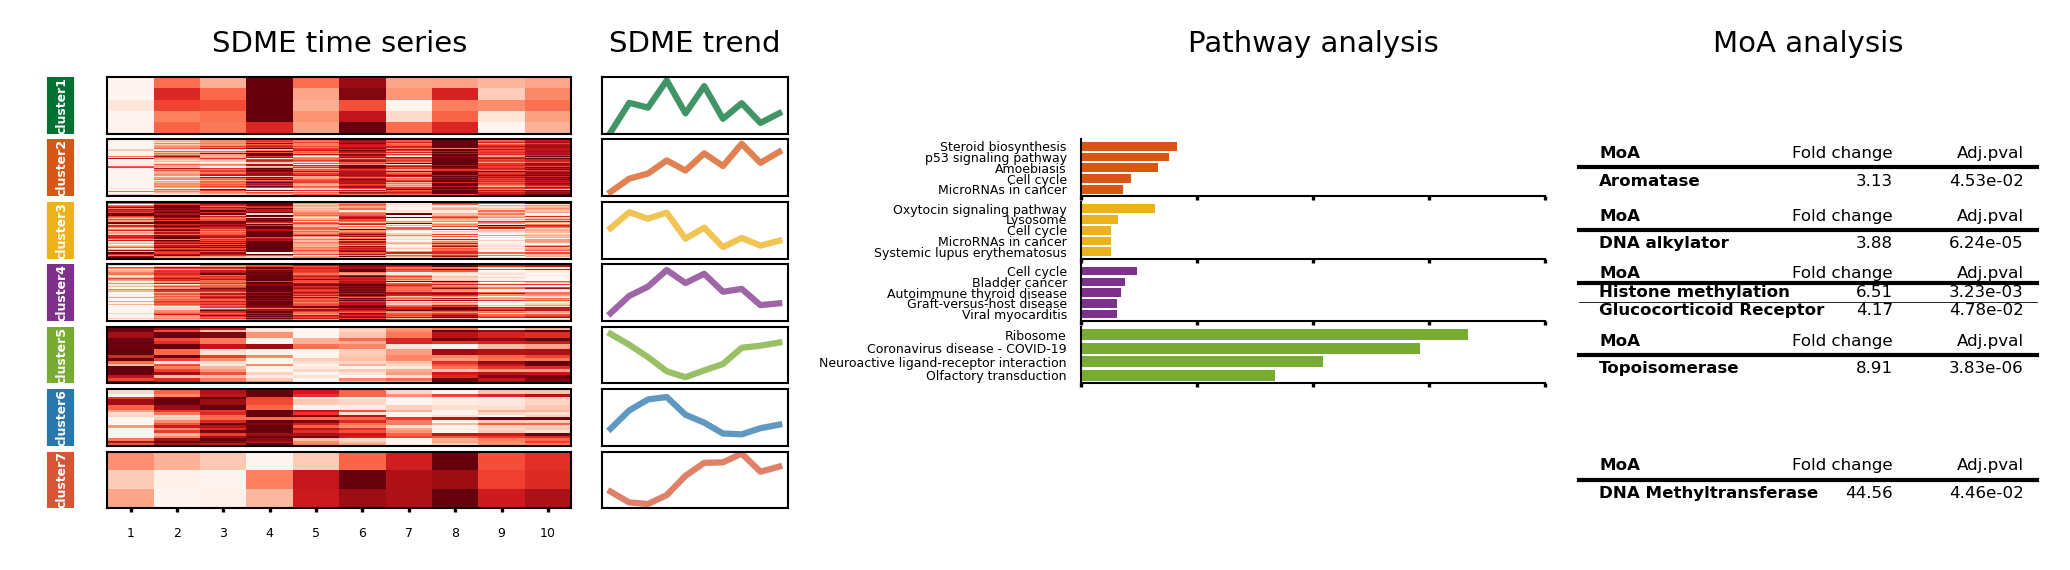

In [68]:
num_clusters = len(np.unique(cluster_labels))

fig, axes = plt.subplots(num_clusters, 6, figsize=(7, 2), sharex='col', gridspec_kw={'width_ratios': [0.1, 1, 0.4, 0.5, 1, 1]})
colors = ["#007132", "#D75615", "#EDB11A", "#7E318A", "#78AB31", "#2A77AC", "#D55535"]

col_ind = 0
for cluster in range(num_clusters):
    axes[cluster, col_ind].spines['top'].set_visible(False)
    axes[cluster, col_ind].spines['right'].set_visible(False)
    axes[cluster, col_ind].spines['bottom'].set_visible(False)
    axes[cluster, col_ind].spines['left'].set_visible(False)
    axes[cluster, col_ind].get_xaxis().set_visible(False)
    axes[cluster, col_ind].get_yaxis().set_visible(False)

    rect = plt.Rectangle((0.4, 0), 0.5, 1, fill=True, color=colors[cluster])
    axes[cluster,col_ind].add_patch(rect)
    axes[cluster,col_ind].text(0.7, 0.5, 'cluster%d' % (cluster+1), color='white', va='center', ha='center', rotation=90, fontsize=3, fontweight="bold")


col_ind = 1
axes[0, col_ind].set_title('SDME time series', fontsize=7)

for cluster in range(num_clusters):
    cluster_data = synergy_mat[cluster_labels == (cluster+1)]
    if cluster_data.shape[0] == 0:
        continue

    sns.heatmap(cluster_data, cmap='Reds', yticklabels=False, xticklabels=False, ax=axes[cluster, 1], cbar=False) # 设置热图颜色（这里用不用修改？）
    axes[cluster, col_ind].spines['top'].set_visible(True)
    axes[cluster, col_ind].spines['right'].set_visible(True)
    axes[cluster, col_ind].spines['bottom'].set_visible(True)
    axes[cluster, col_ind].spines['left'].set_visible(True)
    if cluster != (num_clusters-1):
        axes[cluster, col_ind].set_xticks([])
        axes[cluster, col_ind].tick_params(length=0)
axes[6, col_ind].set_xticks(np.arange(10)+0.5)
axes[6, col_ind].set_xticklabels(np.arange(1, 11), fontsize=3)
axes[6, col_ind].tick_params(axis='x', direction='out', length=1)  # 设置x轴刻度的长度为10


col_ind = 2
axes[0, col_ind].set_title('SDME trend', fontsize=7)

for cluster in range(num_clusters):
    cluster_data = synergy_mat[cluster_labels == (cluster+1)]
    if cluster_data.shape[0] == 0:
        continue
    overall_trend = np.mean(cluster_data, axis=0)
    axes[cluster, col_ind].plot(overall_trend, linewidth=1.5, color=colors[cluster], alpha=0.75)
    axes[cluster, col_ind].set_ylim([0, 1])
    axes[cluster, col_ind].set_xticks([])
    axes[cluster, col_ind].set_yticks([])

col_ind = 3
for cluster in range(num_clusters):
    axes[cluster, col_ind].spines['top'].set_visible(False)
    axes[cluster, col_ind].spines['right'].set_visible(False)
    axes[cluster, col_ind].spines['bottom'].set_visible(False)
    axes[cluster, col_ind].spines['left'].set_visible(False)
    axes[cluster, col_ind].get_xaxis().set_visible(False)
    axes[cluster, col_ind].get_yaxis().set_visible(False)

col_ind = 4
axes[0, col_ind].set_title('Pathway analysis', fontsize=7)
final_null_cluster = 0
for cluster in range(num_clusters):
    axes[cluster, col_ind].spines['top'].set_visible(False)
    axes[cluster, col_ind].spines['right'].set_visible(False)
    
    if cluster_data.shape[0] == 0:
        continue

    cluster_pathways = key_pathway_arr[np.where(cluster_labels==cluster+1)[0]]
    if all(element is None for element in cluster_pathways):
        pass
    else:
        cluster_pathways = pd.concat(cluster_pathways)
        cluster_pathways["pathway"] = cluster_pathways.index
        cluster_pathways_stats = cluster_pathways.value_counts("pathway")
        cluster_pathways_stats = cluster_pathways_stats*100/np.sum(cluster_pathways_stats)

        pathway_plot_data = pd.DataFrame(cluster_pathways_stats[0:5])
        pathway_plot_data.columns = ["cnt"]
        pathway_plot_data["pathway"] = pathway_plot_data.index
        pathway_plot_data = pathway_plot_data[::-1]

        if pathway_plot_data.shape[0] == 0:
            axes[cluster, col_ind].spines['bottom'].set_visible(False)
            axes[cluster, col_ind].spines['left'].set_visible(False)
            axes[cluster, col_ind].get_xaxis().set_visible(False)
            axes[cluster, col_ind].get_yaxis().set_visible(False)
        else:
            axes[cluster, col_ind].barh(pathway_plot_data["pathway"], pathway_plot_data["cnt"], height=0.8, align='center', color=colors[cluster])
            # 调整y轴刻度位置
            y = np.arange(pathway_plot_data.shape[0])  
            axes[cluster, col_ind].set_yticks(y)
            axes[cluster, col_ind].set_yticklabels(pathway_plot_data["pathway"], fontsize=3)
            axes[cluster, col_ind].tick_params(axis='y', direction='out', length=0)
            # 调整x轴的坐标轴
            axes[cluster, col_ind].set_xticks(list(np.arange(0,41,10)))
            axes[cluster, col_ind].set_xticklabels(["0", "10", "20", "30", "40"])
            axes[cluster, col_ind].tick_params(axis='x', direction='out', length=1)
            final_null_cluster = cluster

col_ind = 5
axes[0, col_ind].set_title('MoA analysis', fontsize=7)
for cluster in range(num_clusters):
    axes[cluster, col_ind].spines['top'].set_visible(False)
    axes[cluster, col_ind].spines['right'].set_visible(False)
    axes[cluster, col_ind].spines['bottom'].set_visible(False)
    axes[cluster, col_ind].spines['left'].set_visible(False)
    axes[cluster, col_ind].get_xaxis().set_visible(False)
    axes[cluster, col_ind].get_yaxis().set_visible(False)
    
    if cluster_data.shape[0] == 0:
        continue

    plot_MoA_data = MoA_dict[(cell_line, cluster+1)]
    if plot_MoA_data.shape[0] == 0:
        continue
    plot_MoA_data = plot_MoA_data.iloc[:, [0,3,5]]
    plot_MoA_data.columns = ["MoA", "Fold change", "Adj.pval"]
    plot_MoA_data["Fold change"] = plot_MoA_data["Fold change"].round(2)
    plot_MoA_data['Adj.pval'] = plot_MoA_data['Adj.pval'].apply(lambda x: '{:.2e}'.format((x)))
    plot_MoA_data.index = plot_MoA_data["MoA"]
    plot_MoA_data.drop(columns=["MoA"], inplace=True)    

    col_defs = ([ColumnDefinition(name="MoA", textprops={"ha": "left", "weight": "bold"}, width=1.5,)])

    if plot_MoA_data.shape[0]!=0:
        Table(plot_MoA_data,
             column_definitions=col_defs,
              textprops={"fontsize": 4},
             ax = axes[cluster, col_ind])

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()

# Figure3D

In [69]:
all_ccls = ["A375", 'MDAMB231', 'SKBR3', 'MCF7', 'HS578T', 'BT20','HEPG2','HCC515','A549', 'HUH7']
cluster_number = 7

plot_data = np.zeros([cluster_number, len(all_ccls)])

for i, cell_line in enumerate(all_ccls):
    
    cluster_label_file_name = "cluster_label_res/%s.pkl" % cell_line 
    with open (cluster_label_file_name, "rb") as f:
        cluster_labels, _ = pickle.load(f)
    cluster_ind, cluster_cnts = np.unique(cluster_labels, return_counts=True)
    
    zero_cluster = np.arange(1,8)[~np.in1d(np.arange(1,8), cluster_ind)]
    if len(zero_cluster)!=0:
        cluster_cnts = np.insert(cluster_cnts, zero_cluster-1, 0)
    cluster_percent = cluster_cnts*100/np.sum(cluster_cnts)
    plot_data[:, i] = cluster_percent

plot_data = pd.DataFrame(plot_data, columns=all_ccls)
plot_data = plot_data
plot_data.index = ["Class" + str(i) for i in range(1, cluster_number+1)]


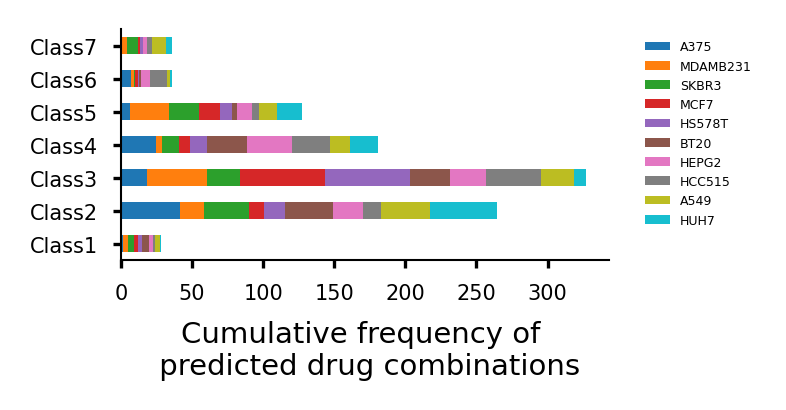

In [70]:
ax = plot_data.plot.barh(stacked=True, figsize=(2.1, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.tick_params(axis='x', direction='out', length=2)  # 设置x轴刻度的长度为10
ax.tick_params(axis='y', direction='out', length=2)  # 设置x轴刻度的长度为10

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_xlabel("Cumulative frequency of \n predicted drug combinations")
plt.show()


The generated images below may slightly differ from those in the paper, but this does not impact our main conclusions. The discrepancy is primarily due to differences in the sorting of items with the same count by the value_counts function.

# Figure3E

In [72]:
all_ccls = ["A375", 'MDAMB231', 'SKBR3', 'MCF7', 'HS578T', 'BT20','HEPG2','HUH7','HCC515','A549']
all_res = []

for cell_line in all_ccls:
    key_pathway_file_name = "key_pathway_res/%s.pkl" % cell_line    

    with open (key_pathway_file_name, "rb") as f:
        key_pathway_ls = pickle.load(f)

    with open ("cluster_label_res/%s.pkl" % cell_line, "rb") as f:
        cluster_lable_ls, _ = pickle.load(f)
        
    key_pathway_arr = np.array(key_pathway_ls, dtype=object)
    for item in key_pathway_arr:
        if isinstance(item,  pd.DataFrame) and item.shape[0]==0:
            null_df = item
            break
    new_key_pathway_arr = []
    for item in key_pathway_arr:
        if isinstance(item, list):
            new_key_pathway_arr.append(null_df)
        else:
            new_key_pathway_arr.append(item)
    key_pathway_arr = np.array(new_key_pathway_arr, dtype=object)

    pathways, cnts = np.unique(pd.concat(key_pathway_arr).index, return_counts=True)
    pathway_stats = pd.DataFrame({"pathway": pathways, "count": cnts}).sort_values("count", ascending=False)
    # based on top N pathways in each cell line
    N = 10
    pathway_stats = pathway_stats.iloc[0:N, :]
    pathway_stats["cell_line"] = [cell_line] * N
    pathway_stats["freq"] = pathway_stats["count"]*100/len(key_pathway_ls)
    pathway_stats["rank"] = np.arange(N+1,1,-1)
    all_res.append(pathway_stats)
all_res = pd.concat(all_res)


In [73]:
pathway_keys = list(all_res.value_counts("pathway").index)
pathway_vals = all_res.value_counts("pathway").values
pathway_keys = np.array(pathway_keys)
pathway_keys = pathway_keys[pathway_vals>=2]
pathway_vals = pathway_vals[pathway_vals>=2]
#top_n = len(pathway_vals)
top_n = 10

pathway_dict = {key: value for key, value in zip(pathway_keys, list(range(top_n,0,-1)))}
ccl_dict = {key: value for key, value in zip(all_ccls, list(range(1, len(all_ccls)+1)))}


In [74]:
import re

def process_string(input_str, len_thre=20):
    if len(input_str) <= len_thre:
        return input_str

    words = re.findall(r'\S+', input_str)
    result, line, length = [], [], 0

    for word in words:
        if length + len(word) <= len_thre:
            line.append(word)
            length += len(word) + 1
        else:
            result.append(" ".join(line))
            line, length = [word], len(word) + 1

    if line:
        result.append(" ".join(line))

    return "\n".join(result)




In [75]:
pathway_names = pathway_keys
pathway_names = [process_string(p) for p in pathway_names]

In [76]:
x_arr = []
y_arr = []
val_arr = []
color_arr = []
pair_arr = []
for i in range(all_res.shape[0]):
    if all_res.iloc[i, 0] in pathway_dict.keys():
        x_arr.append(ccl_dict[all_res.iloc[i, 2]])
        y_arr.append(pathway_dict[all_res.iloc[i, 0]])
        pair_arr.append((ccl_dict[all_res.iloc[i, 2]],pathway_dict[all_res.iloc[i, 0]]))
        val_arr.append(all_res.iloc[i, 3])
        color_arr.append(all_res.iloc[i, -1])
val_arr_norm = list(val_arr/np.max(val_arr))

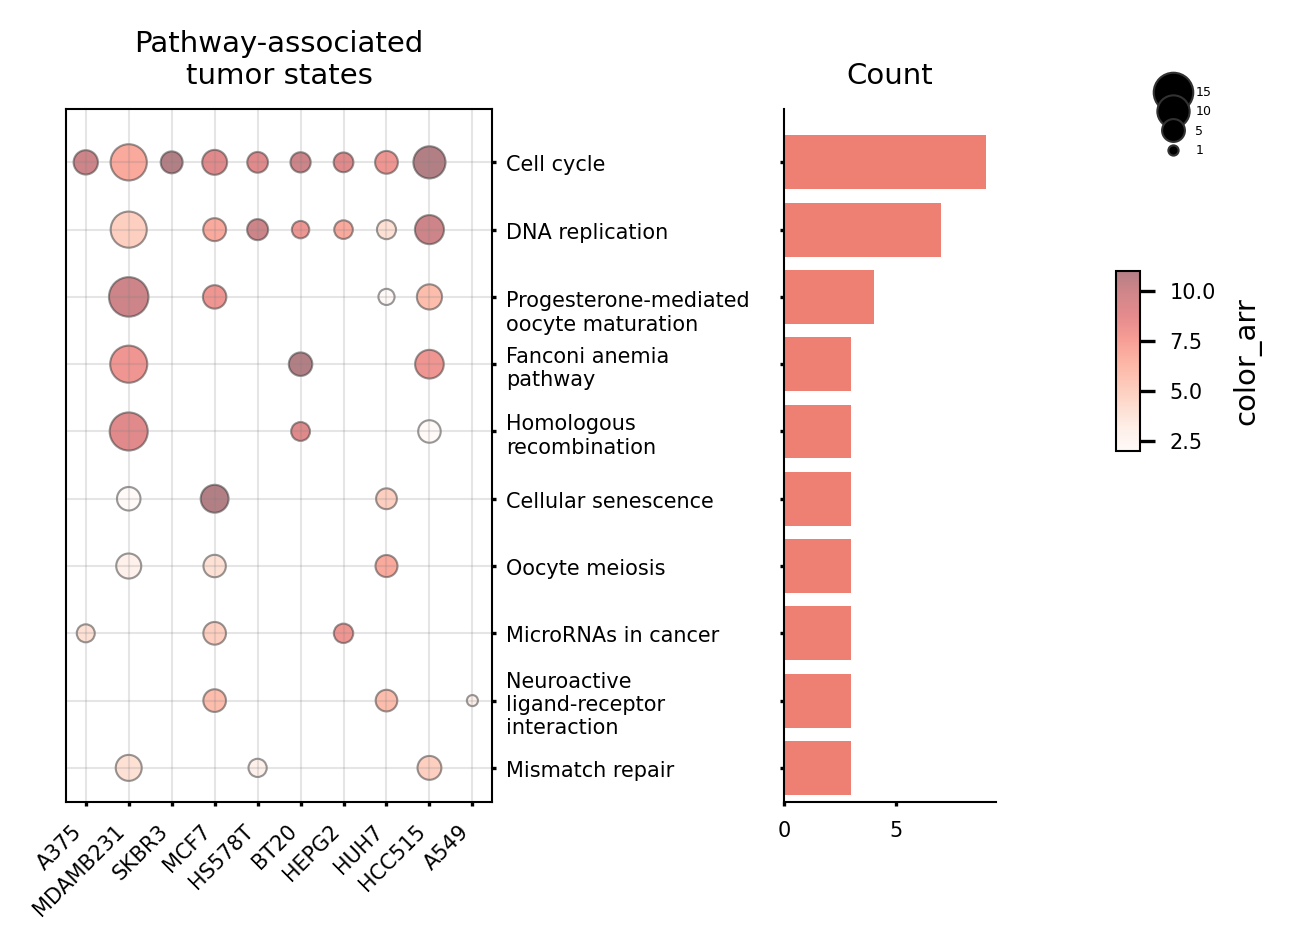

In [77]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(4, 3), gridspec_kw={'width_ratios': [2, 1.1, 1]})

# 1. Plot the bubble heatmap (scatter plot)
scatter = axes[0].scatter(x_arr, y_arr, alpha=0.5, sizes=(np.array(val_arr_norm)*90), edgecolors="#323232", linewidths=0.5, c=color_arr, cmap="Reds")

# Set x-axis ticks and labels
axes[0].set_xticks(np.arange(1, (len(all_ccls)) + 1))
axes[0].set_xticklabels(all_ccls, rotation=45, horizontalalignment='right')  # Fix: Rotate x-axis labels for better visibility
axes[0].tick_params(axis='x', direction='out', length=1)  # Set the length of x-axis ticks to 1

# Set y-axis range and ticks
axes[0].set_ylim([0.5, top_n + 0.8])
axes[0].set_yticks(np.arange(1, (top_n + 1)))
axes[0].yaxis.tick_right()  # Set y-axis ticks to the right
axes[0].set_yticklabels([" "] * top_n)  # Hide y-axis labels
axes[0].tick_params(axis='y', direction='out', length=1)  # Set the length of y-axis ticks to 1

# Add title to the first subplot
axes[0].set_title("Pathway-associated\ntumor states", fontsize=7)

# Add grid lines (vertical and horizontal) with light gray color
i = 1
while i < (len(all_ccls) + 1):
    axes[0].axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
    i += 1
i = 0
while i < (top_n + 1):
    axes[0].axhline(y=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
    i += 1

# 2. Remove unnecessary spines and axis labels from the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].get_xaxis().set_visible(False)

# Add a colorbar to show the color scale for the scatter plot
cax = fig.add_axes([1, 0.5, 0.02, 0.2])  # Define the position for the colorbar
cbar = plt.colorbar(scatter, ax=axes[0], cax=cax)
cbar.set_label('color_arr')  # Label for the colorbar

# Add a legend for the bubble sizes
legend_sizes = [90, 60, 30, 6]  # Define the sizes for the legend
legend_labels = ['15', '10', '5', '1']  # Define the corresponding labels
scatter_legend = [axes[1].scatter([], [], s=size, label=label, edgecolors="#323232", linewidths=0.5, color='black') for size, label in zip(legend_sizes, legend_labels)]
axes[1].legend(handles=scatter_legend, title='', bbox_to_anchor=(3, 1.05), loc='best')  # Add the legend to the second subplot

# 3. Plot the horizontal bar chart for the pathway values
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].barh(np.arange(top_n, 0, -1), pathway_vals[0:10], align="center", color='#ED8072')  # Plot bars for top_n values

# Set y-axis labels for the bar chart (pathway names)
axes[1].set_ylim([0.5, top_n + 0.8])
axes[1].set_yticks(np.arange(1, (top_n + 1)))
axes[1].set_yticklabels(pathway_names[0:10][::-1], horizontalalignment="left")  # Reverse the pathway names and align left
axes[1].tick_params(axis='y', direction='out', length=0)  # Hide y-axis ticks

# 4. Final adjustments for the third subplot
axes[2].tick_params(axis='x', direction='out', length=1)  # Set x-axis tick length to 1
axes[2].set_ylim([0.5, top_n + 0.8])
axes[2].set_yticks(np.arange(1, (top_n + 1)))
axes[2].set_yticklabels([" "] * top_n)  # Hide y-axis labels for the third subplot
axes[2].tick_params(axis='y', direction='out', length=1)  # Set y-axis tick length to 1

# Add title to the third subplot
axes[2].set_title("Count", fontsize=7)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)  # Adjust the horizontal space between subplots
plt.show()

# Figure 3F

In [78]:
all_ccls = ["A375", 'MDAMB231', 'SKBR3', 'MCF7', 'HS578T', 'BT20','HEPG2','HCC515','A549', 'HUH7']
total_key_pathway_df = []
all_class_lables = []

for cell_line in all_ccls:
    class_lable_file_name = "cluster_label_res/%s.pkl" % cell_line 

    with open (class_lable_file_name, "rb") as f:
        class_labels, _ = pickle.load(f)
    
    key_pathway_file_name = "key_pathway_res/%s.pkl" % cell_line    
    with open (key_pathway_file_name, "rb") as f:
        key_pathway_ls = pickle.load(f)
    key_pathway_arr = np.array(key_pathway_ls, dtype=object)
    for item in key_pathway_arr:
        if isinstance(item,  pd.DataFrame) and item.shape[0]==0:
            null_df = item
            break
            
    new_class_labels = []
    new_key_pathway_arr = []
    for i, item in enumerate(key_pathway_arr):
        if isinstance(item, list):
            new_key_pathway_arr.append(null_df)
        else:
            new_key_pathway_arr.append(item)
            new_class_labels.extend([class_labels[i]]*item.shape[0])
    key_pathway_arr = np.array(new_key_pathway_arr, dtype=object)
    key_pathway_df = pd.concat(key_pathway_arr)
    key_pathway_df["class"] = new_class_labels
    total_key_pathway_df.append(key_pathway_df)
    
    all_class_lables.append(class_labels)
    
total_key_pathway_df = pd.concat(total_key_pathway_df)

In [79]:
keys, vals = np.unique(np.concatenate(all_class_lables), return_counts=True)
class_stats = {}
for i in range(0, len(keys)):
    class_stats[keys[i]] = vals[i]

In [80]:
all_res = []
for i in range(1, 7+1):
    class_key_pathway_df = total_key_pathway_df[total_key_pathway_df["class"]==i]
    pathways, cnts = np.unique(class_key_pathway_df.index, return_counts=True)
    pathway_stats = pd.DataFrame({"pathway": pathways, "count": cnts}).sort_values("count", ascending=False)
    # based on top N pathways in class
    N = 10
    pathway_stats = pathway_stats.iloc[0:N, :]
    pathway_stats["class"] = [("class"+str(i))] * N
    pathway_stats["freq"] = pathway_stats["count"]*100/class_stats[i]
    pathway_stats["rank"] = np.arange(N+1,1,-1)
    all_res.append(pathway_stats)
all_res = pd.concat(all_res)

In [81]:
top_n = 10

pathway_keys = list(all_res.value_counts("pathway").index)
pathway_vals = all_res.value_counts("pathway").values
pathway_keys = np.array(pathway_keys)

pathway_keys_top = pathway_keys[pathway_vals>=2]
pathway_vals_top = pathway_vals[pathway_vals>=2]
pathway_keys_all = np.array(all_res.dropna().drop_duplicates("pathway").loc[:,"pathway"])
pathway_vals_all = all_res.value_counts("pathway").loc[pathway_keys]

pathway_keys_bottom = [p for p in pathway_keys_all if p not in pathway_keys_top]
pathway_vals_bottom = all_res.value_counts("pathway").loc[pathway_keys_bottom]

pathway_keys = np.concatenate([pathway_keys_top, pathway_keys_bottom])
pathway_vals = np.concatenate([pathway_vals_top, pathway_vals_bottom])

pathway_dict = {key: value for key, value in zip(pathway_keys, list(range(top_n,0,-1)))}
class_dict = {key: value for key, value in zip(["class"+str(i) for i in range(1,8)], np.arange(1,8))}


In [82]:
pathway_names = pathway_keys
pathway_names = [process_string(p) for p in pathway_names]

In [83]:
x_arr = []
y_arr = []
val_arr = []
pair_arr = []
color_arr = []
for i in range(all_res.shape[0]):
    if all_res.iloc[i, 0] in pathway_dict.keys():
        x_arr.append(class_dict[all_res.iloc[i, 2]])
        y_arr.append(pathway_dict[all_res.iloc[i, 0]])
        pair_arr.append((class_dict[all_res.iloc[i, 2]],pathway_dict[all_res.iloc[i, 0]]))
        val_arr.append(all_res.iloc[i, 3])
        color_arr.append(all_res.iloc[i, -1])

val_arr_norm = list(val_arr/np.max(val_arr))

zero_val = 0.001
zero_color = 0
for x in range(1, (len(class_dict)+1)):
    for y in range(1, top_n+1):
        if (x,y) not in pair_arr:
            x_arr.append(x)
            y_arr.append(y)
            val_arr_norm.append(zero_val)
            color_arr.append(zero_color)

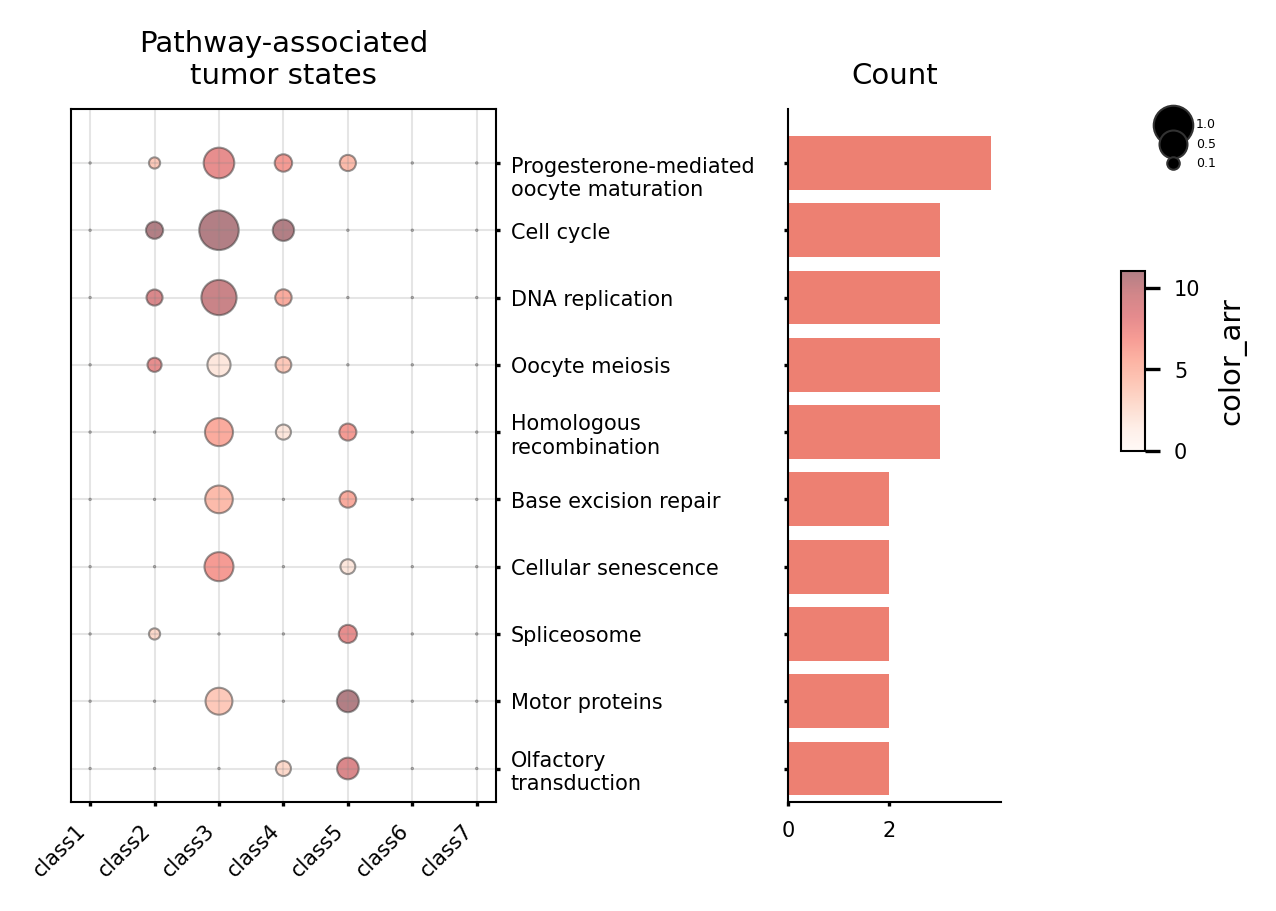

In [84]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(4, 3), gridspec_kw={'width_ratios': [2, 1.1, 1]})

# 1. Plot the bubble heatmap (scatter plot)
# Plot first set of data points with size and color based on the data
scatter = axes[0].scatter(x_arr, y_arr, alpha=0.5, sizes=(np.array(val_arr_norm)*90), edgecolors="#323232", linewidths=0.5, c=color_arr, cmap="Reds")


# Set x-axis ticks and labels
axes[0].set_xticks(np.arange(1, 7 + 1))
axes[0].set_xticklabels(list(class_dict.keys()), rotation=45, horizontalalignment='right')  # Fix: Rotate x-axis labels for better visibility
axes[0].tick_params(axis='x', direction='out', length=1)  # Set the length of x-axis ticks to 1

# Set y-axis range and ticks
axes[0].set_ylim([0.5, top_n + 0.8])
axes[0].set_yticks(np.arange(1, (top_n + 1)))
axes[0].yaxis.tick_right()  # Set y-axis ticks to the right
axes[0].set_yticklabels([" "] * top_n)  # Hide y-axis labels
axes[0].tick_params(axis='y', direction='out', length=1)  # Set the length of y-axis ticks to 1

# Add title to the first subplot
axes[0].set_title("Pathway-associated\ntumor states", fontsize=7)

# Add grid lines (vertical and horizontal) with light gray color
i = 1
while i < (len(class_dict) + 1):
    axes[0].axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
    i += 1
i = 0
while i < (top_n + 1):
    axes[0].axhline(y=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
    i += 1

# 2. Remove unnecessary spines and axis labels from the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].get_xaxis().set_visible(False)

# Add a colorbar to show the color scale for the scatter plot
cax = fig.add_axes([1, 0.5, 0.02, 0.2])  # Define the position for the colorbar
cbar = plt.colorbar(scatter, ax=axes[0], cax=cax)
cbar.set_label('color_arr')  # Label for the colorbar

# Add a legend for the bubble sizes
legend_sizes = [90, 45, 9]  # Define the sizes for the legend
legend_labels = ['1.0', '0.5', '0.1']  # Define the corresponding labels
scatter_legend = [axes[1].scatter([], [], s=size, label=label, edgecolors="#323232", linewidths=0.5, color='black') for size, label in zip(legend_sizes, legend_labels)]
axes[1].legend(handles=scatter_legend, title='', bbox_to_anchor=(3, 0.95), loc='center right')  # Add the legend to the second subplot

# 3. Plot the horizontal bar chart for the pathway values
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].barh(np.arange(top_n, 0, -1), pathway_vals[0:10], align="center", color='#ED8072')  # Plot bars for top_n values

# Set y-axis labels for the bar chart (pathway names)
axes[1].set_ylim([0.5, top_n + 0.8])
axes[1].set_yticks(np.arange(1, (top_n + 1)))
axes[1].set_yticklabels(pathway_names[0:10][::-1], horizontalalignment="left")  # Reverse the pathway names and align left
axes[1].tick_params(axis='y', direction='out', length=0)  # Hide y-axis ticks

# 4. Final adjustments for the third subplot
axes[2].tick_params(axis='x', direction='out', length=1)  # Set x-axis tick length to 1
axes[2].set_xticks([0, 2])  # Set x-axis ticks at specific positions
axes[2].set_ylim([0.5, top_n + 0.8])
axes[2].set_yticks(np.arange(1, (top_n + 1)))
axes[2].set_yticklabels([" "] * top_n)  # Hide y-axis labels for the third subplot
axes[2].tick_params(axis='y', direction='out', length=1)  # Set y-axis tick length to 1

# Add title to the third subplot
axes[2].set_title("Count", fontsize=7)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)  # Adjust the horizontal space between subplots
plt.show()

# Figure3G

In [4]:
all_ccls = ["A375", 'MDAMB231', 'SKBR3', 'MCF7', 'HS578T', 'BT20','HEPG2','HUH7','HCC515','A549']
all_res = []

for cell_line in all_ccls:
    MoA_file_name = "MoA_res/%s.pkl" % cell_line


    import _pickle as cPickle
    with open(MoA_file_name, "rb") as f:
        MoA_dict = cPickle.load(f, encoding='latin1')

    class_arr = []
    for i in range(1, 8):
        if MoA_dict[(cell_line, i)].shape[0] != 0:
            class_arr = class_arr + [i]*MoA_dict[(cell_line, i)].shape[0]

    ccl_MoA_res = pd.concat(list(MoA_dict.values()))
    ccl_MoA_res["cell line"] = [cell_line] * ccl_MoA_res.shape[0]
    ccl_MoA_res["class index"] = class_arr
    all_res.append(ccl_MoA_res)
all_res = pd.concat(all_res)
all_res.index = np.arange(all_res.shape[0])

In [5]:
top_n = 10

temp = all_res.drop_duplicates(["MoA", "cell line"]).value_counts("MoA")
# temp = temp.sort_values(ascending=False)     # add

MoA_keys = list(temp.index)[0:top_n]
MoA_vals = (temp.values)[0:top_n]

# MoA_keys = list(all_res.value_counts("MoA").index)
# MoA_vals = all_res.value_counts("MoA").values
MoA_keys = np.array(MoA_keys)

MoA_keys_top = MoA_keys[MoA_vals>=2]
MoA_vals_top = MoA_vals[MoA_vals>=2]

MoA_keys_all = np.array(all_res.drop_duplicates("MoA").loc[:,"MoA"])
MoA_vals_all = temp.loc[MoA_keys_all]

MoA_keys_bottom = [p for p in MoA_keys_all if p not in MoA_keys_top]
MoA_vals_bottom = temp.loc[MoA_keys_bottom]


MoA_keys = np.concatenate([MoA_keys_top, MoA_keys_bottom])
MoA_vals = np.concatenate([MoA_vals_top, MoA_vals_bottom])

MoA_dict = {key: value for key, value in zip(MoA_keys, list(range(top_n,0,-1)))}
ccl_dict = {key: value for key, value in zip(all_ccls, list(range(1, len(all_ccls)+1)))}

In [6]:
MoA_dict_new = {}
MoA_change_df = pd.read_excel(ROOT_DIR / "../data/drug_type_name_modify.xlsx")
MoA_change_df.iloc[:, 0] = [MoA_change_df.iloc[i, 0][2:] for i in range(MoA_change_df.shape[0])]
MoA_change_df.index = MoA_change_df.iloc[:,0]
for k, v in MoA_dict.items():
    new_k = MoA_change_df.loc[k, "new name"].strip()
    MoA_dict_new[new_k] = v
MoA_dict = MoA_dict_new

MoA_keys_list = list(MoA_dict.keys())
MoA_keys = np.array(MoA_keys_list)

MoA_change_df = MoA_change_df.reset_index(drop=True)
all_res_newname = pd.merge(MoA_change_df,all_res,left_on = 'original name', right_on = 'MoA')
all_res_newname.drop(columns=['original name', 'new name (Chinese)', 'MoA'], inplace= True )
all_res = all_res_newname.rename(columns= {'new name':'MoA'})
all_res['MoA'] = all_res['MoA'].str.strip()

In [7]:
x_arr = []
y_arr = []
val_arr = []
p_arr = []
pair_arr = []
for i in range(all_res.shape[0]):
    if all_res.iloc[i, 0] in MoA_dict.keys():
        x_arr.append(ccl_dict[all_res.iloc[i, -2]])
        y_arr.append(MoA_dict[all_res.iloc[i, 0]])
        pair_arr.append((ccl_dict[all_res.iloc[i, -2]],MoA_dict[all_res.iloc[i, 0]]))
        val_arr.append(all_res.iloc[i, 3])
        p_arr.append(all_res.iloc[i, 4])
val_arr_norm = list(val_arr/np.max(val_arr))

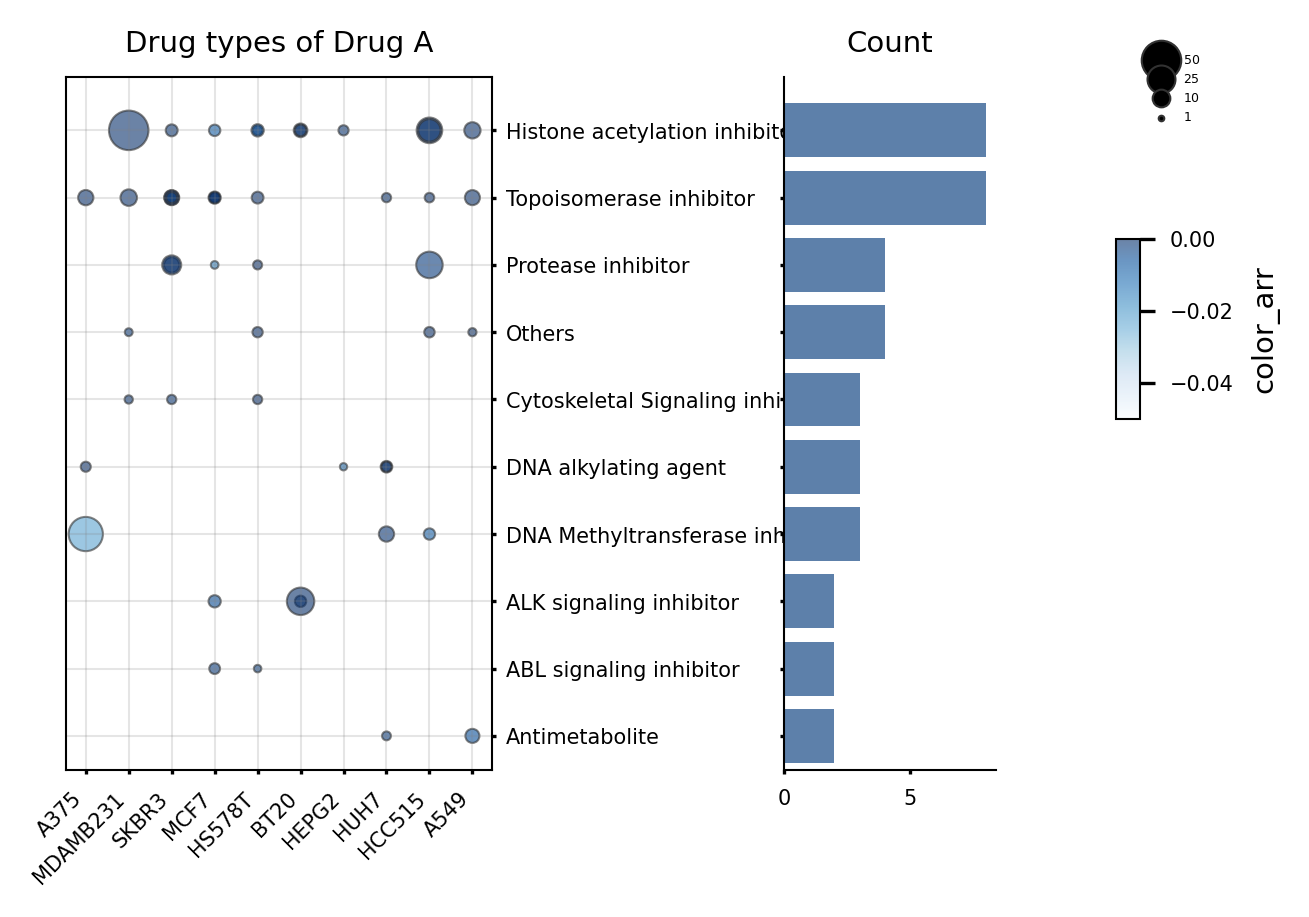

In [8]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(4, 3), gridspec_kw={'width_ratios': [2, 1.1, 1]})

# 1. Plot the bubble heatmap (scatter plot)
# The size and color of each point represent different attributes
scatter = axes[0].scatter(
    x_arr, y_arr, alpha=0.6, sizes=(np.array(val_arr_norm) * 90),
    edgecolors="#323232", linewidths=0.5, c=-np.array(p_arr),
    cmap="Blues", vmin=-0.05  # Setting the colormap to Blues with a minimum color limit
)

# Set x-axis ticks and labels
axes[0].set_xticks(np.arange(1, (len(all_ccls)) + 1))
axes[0].set_xticklabels(all_ccls, rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better visibility
axes[0].tick_params(axis='x', direction='out', length=1)  # Set the length of x-axis ticks to 1

# Set y-axis range and ticks
axes[0].set_ylim([0.5, top_n + 0.8])
axes[0].set_yticks(np.arange(1, (top_n + 1)))
axes[0].yaxis.tick_right()  # Move y-axis ticks to the right
axes[0].set_yticklabels([" "] * top_n)  # Hide y-axis labels
axes[0].tick_params(axis='y', direction='out', length=1)  # Set the length of y-axis ticks to 1

# Add title to the first subplot
axes[0].set_title("Drug types of Drug A", fontsize=7)

# Add grid lines (vertical and horizontal) with light gray color
for i in range(1, len(all_ccls) + 1):
    axes[0].axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
for i in range(0, top_n + 1):
    axes[0].axhline(y=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)

# 2. Remove unnecessary spines and axis labels from the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].get_xaxis().set_visible(False)

# Set y-axis labels for MoA types in the second subplot
axes[1].set_ylim([0.5, top_n + 0.8])
axes[1].set_yticks(np.arange(1, (top_n + 1)))
axes[1].set_yticklabels(MoA_keys[::-1], horizontalalignment="left")  # Reverse order of MoA labels
axes[1].tick_params(axis='y', direction='out', length=0)  # Hide y-axis tick marks

# Add colorbar to the first subplot
cax = fig.add_axes([1, 0.5, 0.02, 0.2])  # Define the position for the colorbar
cbar = plt.colorbar(scatter, ax=axes[0], cax=cax)
cbar.set_label('color_arr')  # Label for the colorbar

# Add a legend for the bubble sizes
legend_sizes = [90, 45, 18, 1.8]  # Define sizes for the legend
legend_labels = ['50', '25', '10', '1']  # Define corresponding labels
scatter_legend = [
    axes[1].scatter([], [], s=size, label=label, edgecolors="#323232",
                    linewidths=0.5, color='black') for size, label in zip(legend_sizes, legend_labels)
]
axes[1].legend(handles=scatter_legend, title='', bbox_to_anchor=(2.95, 1.05), loc='best')

# 3. Plot the horizontal bar chart for MoA values
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].barh(np.arange(1, top_n + 1), MoA_vals[0:10][::-1], align="center", color='#5D80AA')

# Set y-axis labels for the bar chart
axes[2].tick_params(axis='x', direction='out', length=1)  # Set x-axis tick length to 1
axes[2].set_ylim([0.5, top_n + 0.8])
axes[2].set_yticks(np.arange(1, (top_n + 1)))
axes[2].set_yticklabels([" "] * top_n)  # Hide y-axis labels for the third subplot
axes[2].tick_params(axis='y', direction='out', length=1)  # Set y-axis tick length to 1

# Add title to the third subplot
axes[2].set_title("Count", fontsize=7)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)  # Adjust the horizontal space between subplots
plt.show()

# Figure 3H

In [9]:
from itertools import chain

all_ccls = ["A375", 'MDAMB231', 'SKBR3', 'MCF7', 'HS578T', 'BT20','HEPG2','HCC515','A549', 'HUH7']
all_res = []

for cell_line in all_ccls:
    MoA_file_name = "MoA_res/%s.pkl" % cell_line    

    with open(MoA_file_name, "rb") as f:
        MoA_dict = pickle.load(f)
    ccl_MoA_res = pd.concat(list(MoA_dict.values()))
    class_labels = [["class"+str(i+1)]*df.shape[0] for i, df in enumerate(list(MoA_dict.values())) if df.shape[0]!=0]
    class_labels = list(chain.from_iterable(class_labels))
    ccl_MoA_res["class"] = class_labels
    all_res.append(ccl_MoA_res)
all_res = pd.concat(all_res)
all_res.index = np.arange(all_res.shape[0])


In [10]:
# show top 20 MoA in total
top_n = 10
temp = all_res.drop_duplicates(["MoA", "class"]).value_counts("MoA")

MoA_keys = list(temp.index)[0:top_n]
MoA_vals = (temp.values)[0:top_n]
MoA_dict = {key: value for key, value in zip(MoA_keys, list(range(top_n,0,-1)))}
class_dict = {key: value for key, value in zip(["class"+str(i) for i in range(1,8)], np.arange(1,8))}

MoA_dict_new = {}
MoA_change_df = pd.read_excel(ROOT_DIR / "../data/drug_type_name_modify.xlsx")
MoA_change_df.iloc[:, 0] = [MoA_change_df.iloc[i, 0][2:] for i in range(MoA_change_df.shape[0])]
MoA_change_df.index = MoA_change_df.iloc[:,0]
for k, v in MoA_dict.items():
    new_k = MoA_change_df.loc[k, "new name"].strip()
    MoA_dict_new[new_k] = v
MoA_dict = MoA_dict_new
MoA_keys_list = list(MoA_dict.keys())
MoA_keys = np.array(MoA_keys_list)

MoA_change_df = MoA_change_df.reset_index(drop=True)
all_res_newname = pd.merge(MoA_change_df,all_res,left_on = 'original name', right_on = 'MoA')
all_res_newname.drop(columns=['original name', 'new name (Chinese)', 'MoA'], inplace= True )
all_res = all_res_newname.rename(columns= {'new name':'MoA'})
all_res['MoA'] = all_res['MoA'].str.strip()

In [11]:
x_arr = []
y_arr = []
val_arr = []
p_arr = []
pair_arr = []
for i in range(all_res.shape[0]):
    if all_res.iloc[i, 0] in MoA_dict.keys():
        x_arr.append(class_dict[all_res.iloc[i, -1]])
        y_arr.append(MoA_dict[all_res.iloc[i, 0]])
        pair_arr.append((class_dict[all_res.iloc[i, -1]],MoA_dict[all_res.iloc[i, 0]]))
        val_arr.append(all_res.iloc[i, 3])
        p_arr.append(all_res.iloc[i, 4])
val_arr_norm = list(val_arr/np.max(val_arr))

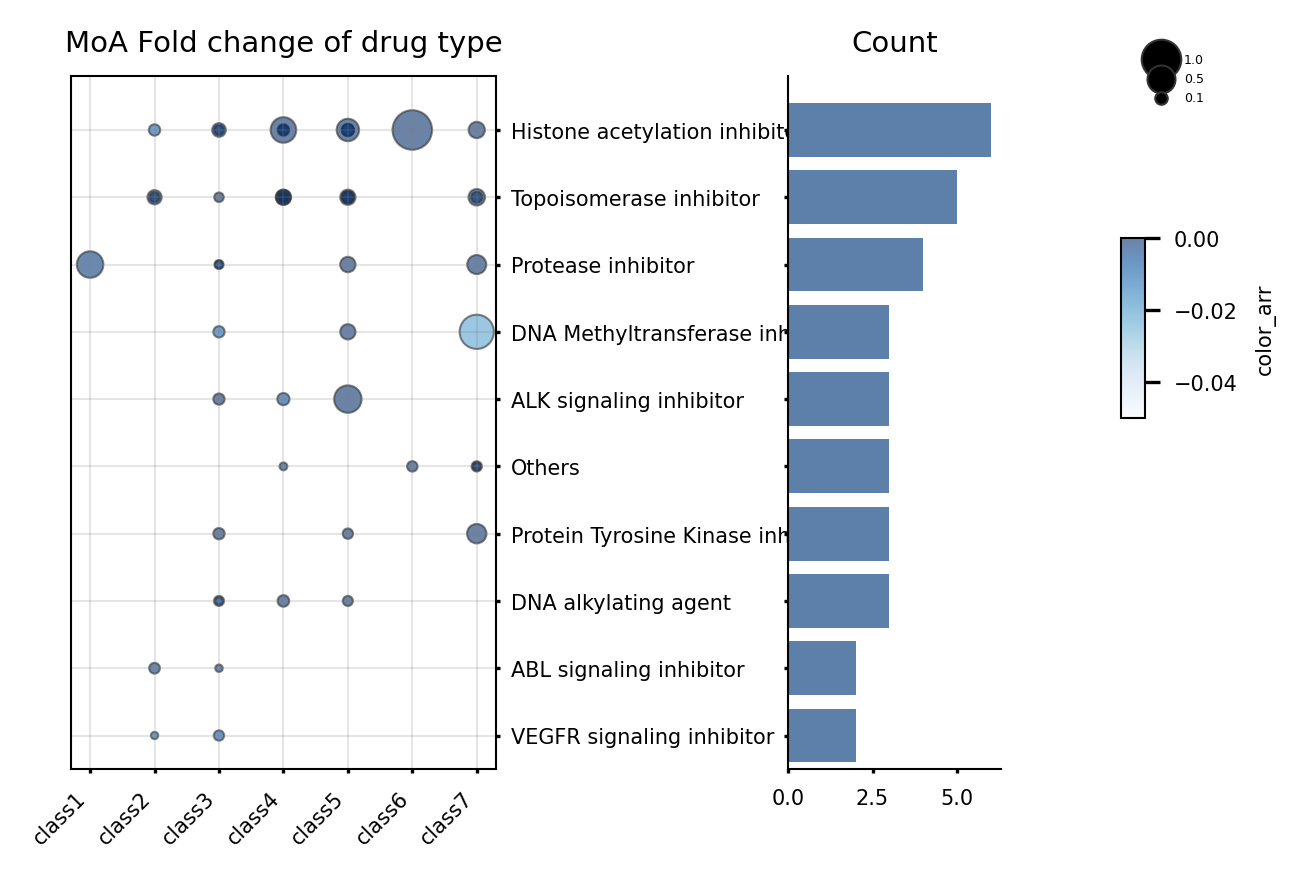

In [12]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(4, 3), gridspec_kw={'width_ratios': [2, 1.1, 1]})

# 1. Plot the bubble heatmap (scatter plot)
# Scatter plot with varying sizes and colors, representing data attributes
scatter = axes[0].scatter(
    x_arr, y_arr, alpha=0.6, sizes=(np.array(val_arr_norm) * 90),
    edgecolors="#323232", linewidths=0.5, c=-np.array(p_arr),
    cmap="Blues", vmin=-0.05  # Setting the color map to 'Blues' with a minimum color limit
)

# Set x-axis ticks and labels for class categories
axes[0].set_xticks(np.arange(1, (len(class_dict)) + 1))
axes[0].set_xticklabels(list(class_dict.keys()), rotation=45, horizontalalignment='right')  # Rotate x-axis labels for readability
axes[0].tick_params(axis='x', direction='out', length=1)  # Set x-axis tick length to 1

# Set y-axis range and ticks
axes[0].set_ylim([0.5, top_n + 0.8])
axes[0].set_yticks(np.arange(1, (top_n + 1)))
axes[0].yaxis.tick_right()  # Move y-axis ticks to the right
axes[0].set_yticklabels([" "] * top_n)  # Hide y-axis labels
axes[0].tick_params(axis='y', direction='out', length=1)  # Set y-axis tick length to 1

# Add a title to the first subplot
axes[0].set_title("MoA Fold change of drug type", fontsize=7)

# Add grid lines with light gray color for both horizontal and vertical
for i in range(1, len(class_dict) + 1):
    axes[0].axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)
for i in range(0, top_n + 1):
    axes[0].axhline(y=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.2)

# 2. Remove unnecessary spines and x-axis visibility from the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].get_xaxis().set_visible(False)

# Set y-axis labels for MoA types in the second subplot
axes[1].set_ylim([0.5, top_n + 0.8])
axes[1].set_yticks(np.arange(1, (top_n + 1)))
axes[1].set_yticklabels(MoA_keys[0:10][::-1], horizontalalignment="left")  # Reverse MoA labels for better visual alignment
axes[1].tick_params(axis='y', direction='out', length=0)  # Remove y-axis ticks

# Add colorbar for the scatter plot in the first subplot
cax = fig.add_axes([1, 0.5, 0.02, 0.2])  # Define the position for the colorbar
cbar = plt.colorbar(scatter, ax=axes[0], cax=cax)
cbar.set_label('color_arr', fontsize=5)  # Add label for the colorbar

# Add a legend for bubble sizes
legend_sizes = [90, 45, 9]  # Define the bubble sizes
legend_labels = ['1.0', '0.5', '0.1']  # Define corresponding legend labels
scatter_legend = [
    axes[1].scatter([], [], s=size, label=label, edgecolors="#323232", linewidths=0.5, color='black') for size, label in zip(legend_sizes, legend_labels)
]
axes[1].legend(handles=scatter_legend, title='', bbox_to_anchor=(2.95, 1.05), loc='best')  # Position the legend

# 3. Plot the horizontal bar chart for MoA values
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].barh(np.arange(1, top_n + 1), MoA_vals[0:10][::-1], align="center", color='#5D80AA')  # Plot bars with reversed MoA values

# Set y-axis ticks and labels for the bar chart (hide labels for this subplot)
axes[2].tick_params(axis='x', direction='out', length=1)  # Set x-axis tick length to 1
axes[2].set_ylim([0.5, top_n + 0.8])
axes[2].set_yticks(np.arange(1, (top_n + 1)))
axes[2].set_yticklabels([" "] * top_n)  # Hide y-axis labels
axes[2].tick_params(axis='y', direction='out', length=1)  # Set y-axis tick length to 1

# Add title to the third subplot
axes[2].set_title("Count", fontsize=7)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)  # Set the horizontal space between subplots
plt.show()
